In [80]:
import nest
import pylab
import numpy
import nest.voltage_trace

possible numeric stability problem in nest. follow up

In [81]:
MGN_params = {
        #'model': 'aeif_cond_exp',
        'E_L': -60.,  # resting membrane potential (mV) - see refs
        'C_m': 150.0,      # membrane capacity (pF)
        'g_L': 10.0,      # leak conductance  - see refs
        'V_reset': -55.,  # reset membrane potential after a spike (mV)  - for burstiness
        'V_th': -50.,  # spike threshold (mV)
        'tau_syn_ex': 2.5, # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10., # exc. synaptic time constant  - mit paper

        "a": 40.,
        "b": 0.,
        'tau_w': 150.,
        #'V_m': -60.,
}

TRN_params = {
        #'model': 'aeif_cond_exp',
        'E_L': -60.,  # resting membrane potential (mV) - see refs
        'C_m': 150.0,      # membrane capacity (pF)
        'g_L': 10.0,      # leak conductance  - see refs
        'V_reset': -55.,  # reset membrane potential after a spike (mV)  - for burstiness
        'V_th': -50.,  # spike threshold (mV)
        'tau_syn_ex': 2.5, # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10., # exc. synaptic time constant  - mit paper
        "a": 30.,
        "b": 80.,
        'tau_w': 300.,
        #'V_m': -70.,
}   

# according to RS neuron parameters in Destexhe, A. (2009). https://doi.org/10.1007/s10827-009-0164-4
# with "strong adaptation"
neuron_exc_params_aone = {
        #'model': 'aeif_cond_exp',
        "a": 2.,
        "b": 40.,
        'tau_w': 150.,

        'C_m': 150.,
        'g_L': 10.,
        'V_reset': -60.,
        'V_th': -50.,
        'E_L': -70.,
        'V_m': -60.,
}

# according to fast-spiking inh neuron parameters in Destexhe, A. (2009). https://doi.org/10.1007/s10827-009-0164-4
neuron_inh_params_aone = {
        #'model': 'aeif_cond_exp',
        "a": 2.,
        "b": 0.,            # no spike-based adaptation
        'tau_w': 600.,

        'C_m': 150.,
        'g_L': 10.,
        'V_reset': -60.,
        'V_th': -50.,
        'E_L': -70.,  # this is changed
        'V_m': -60.,
}

In [82]:
def oneSpikeEpsp (params, weight):
    nest.ResetKernel()

    n = nest.Create("aeif_cond_exp", 1)
    #nest.SetStatus(n, neuron_params_thl)
    nest.SetStatus(n, params)

    v = nest.Create("voltmeter")
    #mm = nest.Create('multimeter', 1, {'record_from': ['V_m']})
    #nest.SetStatus(mm, {'interval': 0.1})

    nest.Connect(v, n)

    sg = nest.Create('spike_generator')

    nest.SetStatus(sg, {'spike_times' : [200.]})

    nest.Connect(sg, n, syn_spec={'weight':weight})

    nest.Simulate(500)

    nest.voltage_trace.from_device(v)
    
    #print(v.events['V_m'])
    if weight > 0:
        print(max(v.events['V_m'][195:]))
    else:
        print(min(v.events['V_m'][195:]))

-70.00442522702471


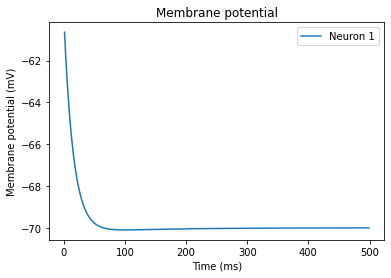

In [101]:
# from MGN to eA1
oneSpikeEpsp(neuron_exc_params_aone, 0.05)

-69.96311990167764


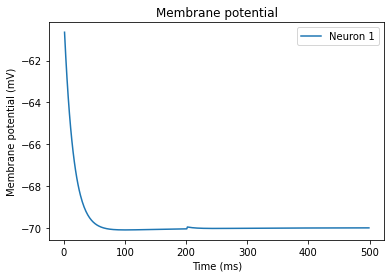

In [102]:
# from eA1 to eA1
oneSpikeEpsp(neuron_exc_params_aone, 1.)

-71.29531392871046


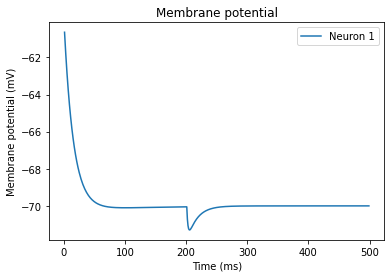

In [85]:
# from iA1 to eA1
oneSpikeEpsp(neuron_exc_params_aone, -9.)

-70.0195376037454


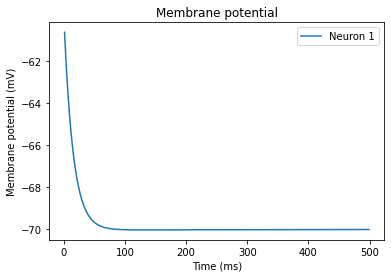

In [86]:
# from MGN to iA1
oneSpikeEpsp(neuron_inh_params_aone, 0.05)

-69.9476748240523


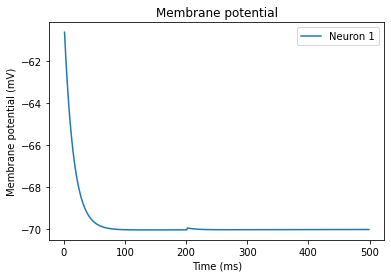

In [87]:
# from eA1 to iA1
oneSpikeEpsp(neuron_inh_params_aone, 1.)

-71.283059939368


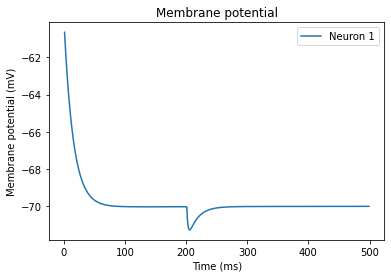

In [88]:
# from iA1 to iA1
oneSpikeEpsp(neuron_inh_params_aone, -9.)

-75.6915529455445


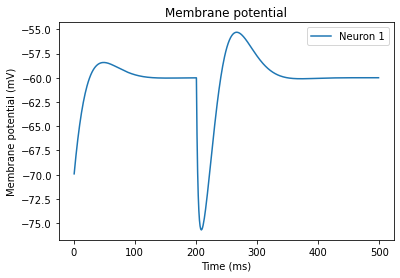

In [89]:
# from TRN to MGN
oneSpikeEpsp(MGN_params, -44.)

-59.976042142807216


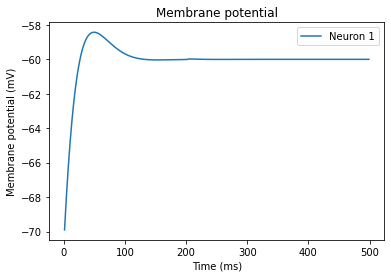

In [90]:
# from eA1 to MGN
oneSpikeEpsp(MGN_params, .04)

-58.36782243467346


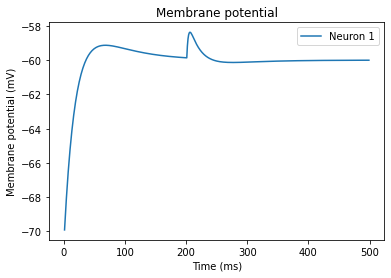

In [91]:
# from MGN to TRN
oneSpikeEpsp(TRN_params, 2.2)

-59.81661299121486


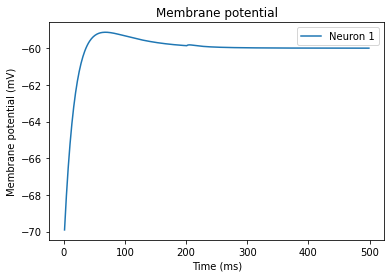

In [92]:
# from eA1 to TRN
oneSpikeEpsp(TRN_params, 0.08)

### Target of 1.0 mV

-59.04595087521307


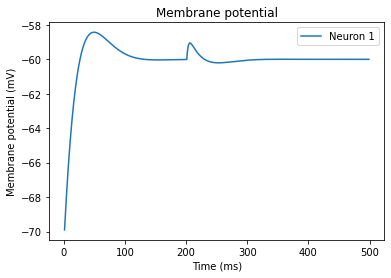

In [93]:
oneSpikeEpsp(MGN_params, 1.4)

-59.04646716808193


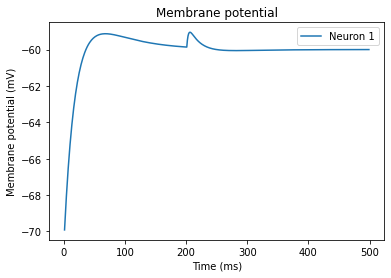

In [94]:
oneSpikeEpsp(TRN_params, 1.2)

-68.98899315256065


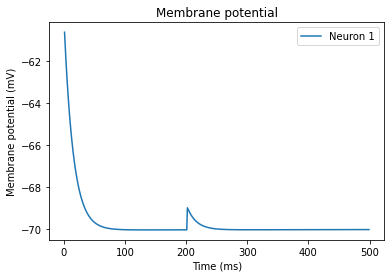

In [95]:
oneSpikeEpsp(neuron_inh_params_aone, 12.)

-69.00424492860317


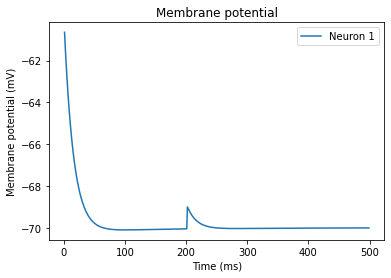

In [96]:
oneSpikeEpsp(neuron_exc_params_aone, 12.)

### Target of 0.5 mV

-59.5226630843546


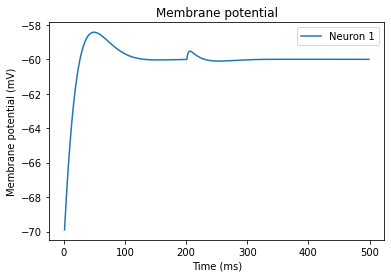

In [97]:
oneSpikeEpsp(MGN_params, .7)

-59.45791924969287


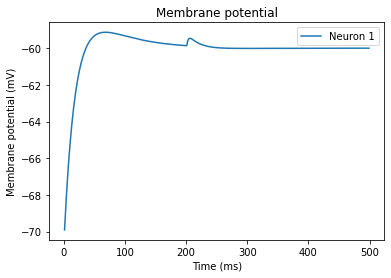

In [98]:
oneSpikeEpsp(TRN_params, .6)

-69.51018992831179


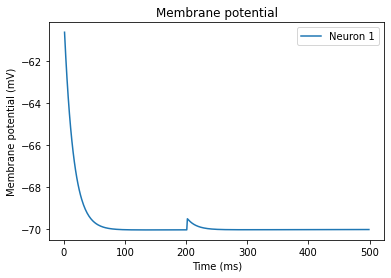

In [99]:
oneSpikeEpsp(neuron_inh_params_aone, 6.)

-69.52554678852678


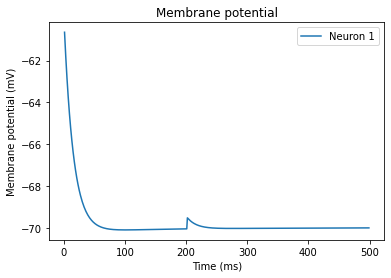

In [100]:
oneSpikeEpsp(neuron_exc_params_aone, 6.)